# NILMTK Rapid Experimentation API

A API torna a execução de experimentos extremamente rápida e eficiente, com ênfase na criação de experimentos reproduzíveis com ajuste fino, onde o desempenho do modelo e dos parâmetros pode ser facilmente avaliado em um relance.


Importando bibliotecas

In [1]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import nilmtk
from nilmtk import MeterGroup
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
rcParams['figure.figsize'] = (13, 10)

import pathlib
pathlib.Path().resolve()

PosixPath('/home/hb/projetos/nilmtk')

Convertendo a base de dados

In [2]:
from nilmtk.dataset_converters import convert_redd
convert_redd('/home/hb/projetos/nilmtk/BD/REDD_1HOUSE/low_freq', './data/teste14.h5')

Loading house 1... 1 <bound method NDFrame.head of physical_quantity               power
type                           active
2011-04-18 10:22:09-03:00  224.190002
2011-04-18 10:22:10-03:00  225.570007
2011-04-18 10:22:11-03:00  226.089996
2011-04-18 10:22:12-03:00  222.740005
2011-04-18 10:22:13-03:00  222.199997
...                               ...
2011-05-24 16:56:58-03:00  234.440002
2011-05-24 16:56:59-03:00  235.570007
2011-05-24 16:57:00-03:00  234.770004
2011-05-24 16:57:01-03:00  235.550003
2011-05-24 16:57:02-03:00  235.429993

[1561660 rows x 1 columns]>
2 <bound method NDFrame.head of physical_quantity               power
type                           active
2011-04-18 10:22:09-03:00  118.629997
2011-04-18 10:22:10-03:00  118.989998
2011-04-18 10:22:11-03:00  119.050003
2011-04-18 10:22:12-03:00  118.940002
2011-04-18 10:22:13-03:00  118.830002
...                               ...
2011-05-24 16:56:58-03:00   38.720001
2011-05-24 16:56:59-03:00   38.529999
2011-05-24 16:

18 <bound method NDFrame.head of physical_quantity          power
type                      active
2011-04-18 10:22:13-03:00   46.0
2011-04-18 10:22:16-03:00   46.0
2011-04-18 10:22:20-03:00   46.0
2011-04-18 10:22:23-03:00   46.0
2011-04-18 10:22:26-03:00   46.0
...                          ...
2011-05-24 16:56:20-03:00    1.0
2011-05-24 16:56:23-03:00    1.0
2011-05-24 16:56:27-03:00    1.0
2011-05-24 16:56:30-03:00    1.0
2011-05-24 16:56:34-03:00    1.0

[745878 rows x 1 columns]>
19 <bound method NDFrame.head of physical_quantity          power
type                      active
2011-04-18 10:22:13-03:00    0.0
2011-04-18 10:22:16-03:00    0.0
2011-04-18 10:22:20-03:00    0.0
2011-04-18 10:22:23-03:00    0.0
2011-04-18 10:22:26-03:00    0.0
...                          ...
2011-05-24 16:56:20-03:00    0.0
2011-05-24 16:56:23-03:00    0.0
2011-05-24 16:56:27-03:00    0.0
2011-05-24 16:56:30-03:00    0.0
2011-05-24 16:56:34-03:00    0.0

[745878 rows x 1 columns]>
20 <bound method NDF

AttributeError: 'NoneType' object has no attribute '_v_attrs'

Importando a base de dados

In [2]:
from nilmtk import DataSet
from nilmtk.utils import print_dict

redd = DataSet('./data/teste10.h5')
#iawe = DataSet('/data/iawe.h5')

print_dict(redd.metadata)
print_dict(redd.buildings)

Carregando exemplo de uma casa/eletrodoméstico

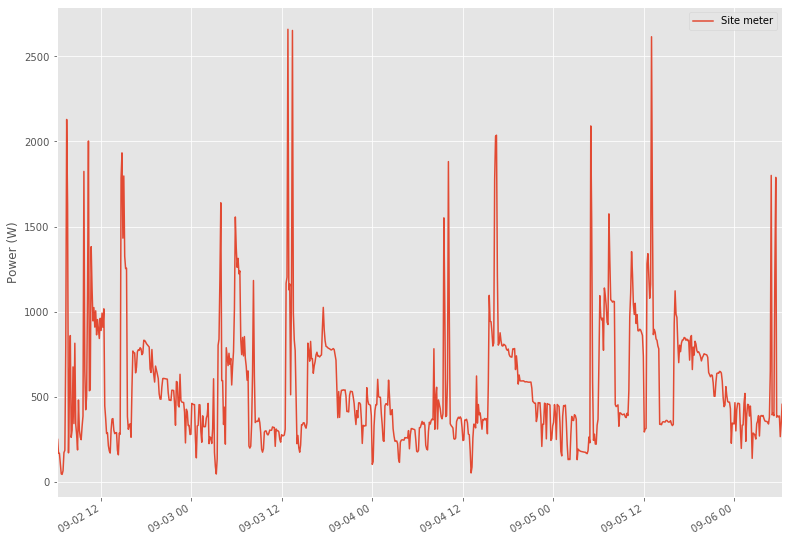

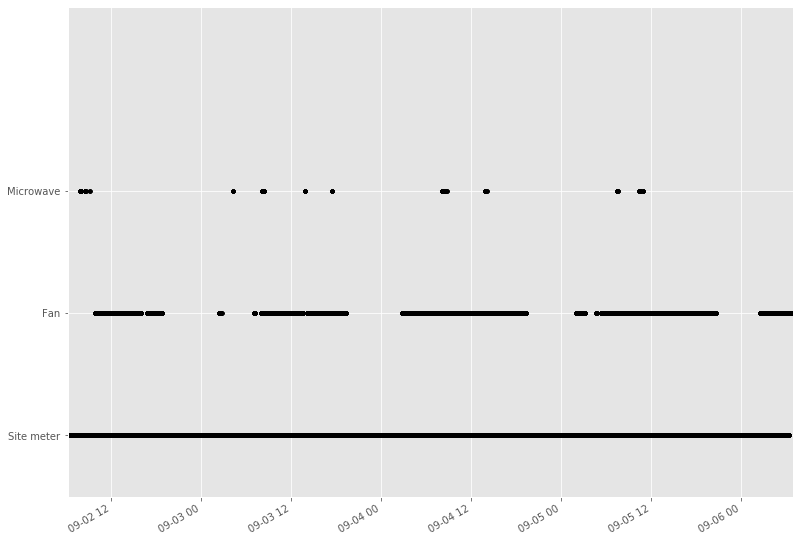

In [3]:
build = 1
elec = redd.buildings[build].elec
elec.mains().power_series_all_data().head()
elec.mains().plot()
# sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40) # Plot appliances when they are in use¶


In [2]:
next(elec.load())

NameError: name 'elec' is not defined

Empty DataFrame
Columns: []
Index: []


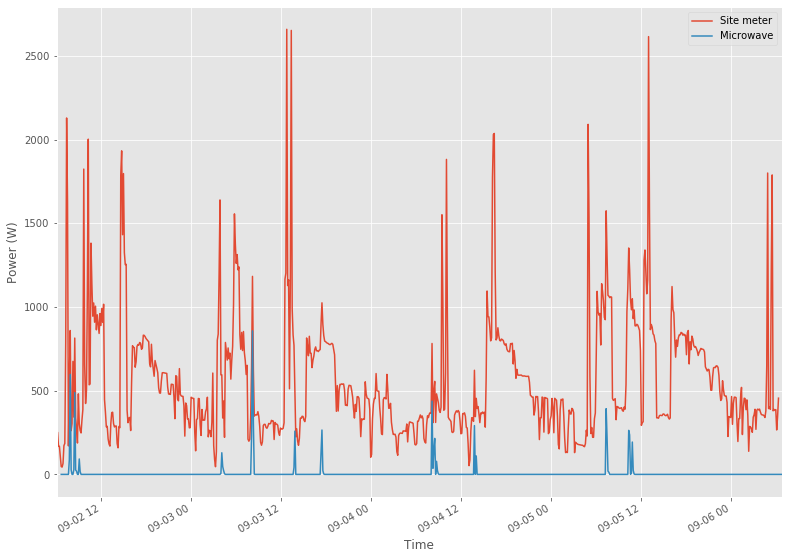

In [30]:
microwave = elec['microwave']
microwave.available_columns()
print(next(microwave.load()).head())

from nilmtk.elecmeter import ElecMeterID

meter1 = elec[ElecMeterID(instance=0, building=build, dataset='REDD')]

redd.set_window(start='2021-09-02 06:14:34', end='2021-09-06 10:24:14')
meter1.plot()
elec['microwave'].plot()
plt.xlabel("Time");

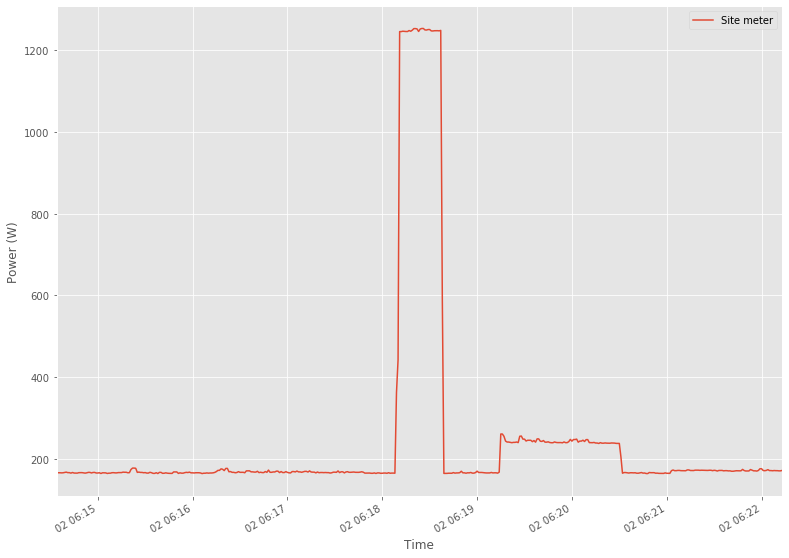

In [31]:
redd.set_window(start='2021-09-02 06:14:34', end='2021-09-02 06:22:14')
meter1.plot() # 1 segundo
elec['microwave'].plot() # 3 segundos
plt.xlabel("Time");

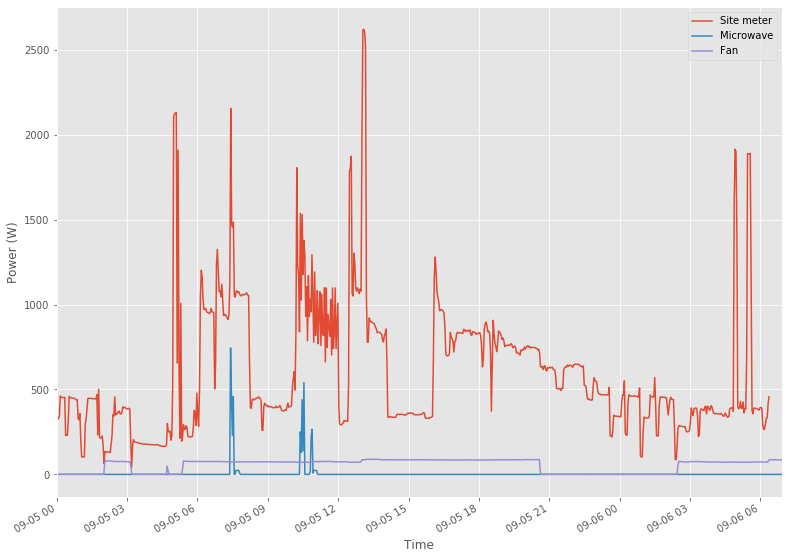

In [32]:
redd.set_window(start='2021-09-05 00:00:00', end='2021-09-06 10:24:14')
meter1.plot()
elec['microwave'].plot()
elec['fan'].plot()
plt.xlabel("Time");

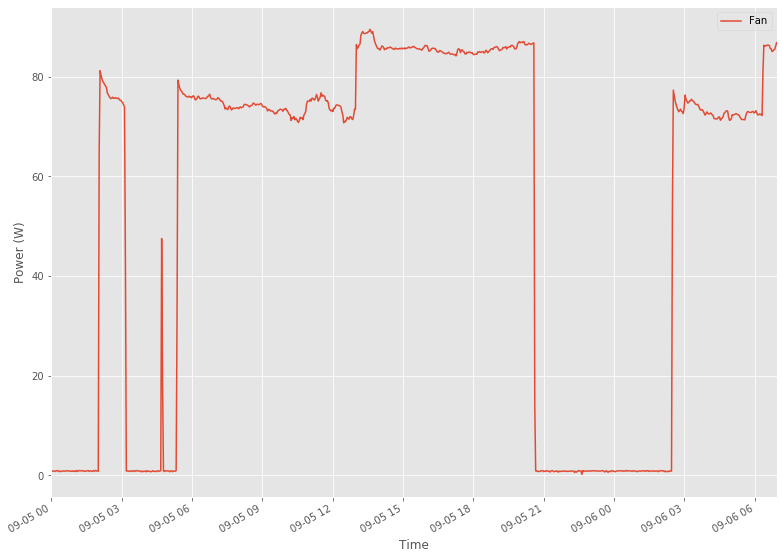

In [34]:
redd.set_window(start='2021-09-05 00:00:00', end='2021-09-06 23:00:00')
# meter1.plot()
# elec['microwave'].plot()
elec['fan'].plot()
plt.xlabel("Time");

In [71]:
next(elec.load())


Loading data for meter ElecMeterID(instance=3, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


physical_quantity         frequency voltage    power          current  \
type                                        reactive apparent           
2021-09-02 06:14:30-04:00       NaN     NaN      NaN      NaN     NaN   
2021-09-02 06:14:35-04:00       NaN     NaN      NaN      NaN     NaN   
2021-09-02 06:14:40-04:00       NaN     NaN      NaN      NaN     NaN   
2021-09-02 06:14:45-04:00       NaN     NaN      NaN      NaN     NaN   
2021-09-02 06:14:50-04:00       NaN     NaN      NaN      NaN     NaN   
...                             ...     ...      ...      ...     ...   
2021-09-02 06:21:50-04:00       NaN     NaN      NaN      NaN     NaN   
2021-09-02 06:21:55-04:00       NaN     NaN      NaN      NaN     NaN   
2021-09-02 06:22:00-04:00       NaN     NaN      NaN      NaN     NaN   
2021-09-02 06:22:05-04:00       NaN     NaN      NaN      NaN     NaN   
2021-09-02 06:22:10-04:00       NaN     NaN      NaN      NaN     NaN   

physical_quantity               power power factor  
type                           active               
2021-09-02 06:14:30-04:00  167.199997          NaN  
2021-09-02 06:14:35-04:00  167.259995          NaN  
2021-09-02 06:14:40-04:00  167.559998          NaN  
2021-09-02 06:14:45-04:00  166.839996          NaN  
2021-09-02 06:14:50-04:00  167.160004          NaN  
...                               ...          ...  
2021-09-02 06:21:50-04:00  172.639999          NaN  
2021-09-02 06:21:55-04:00  172.979996          NaN  
2021-09-02 06:22:00-04:00  173.940002          NaN  
2021-09-02 06:22:05-04:00  172.400009          NaN  
2021-09-02 06:22:10-04:00  172.199997          NaN  

[93 rows x 7 columns]

In [5]:
next(meter1.load())


physical_quantity,power
type,active
2021-09-02 06:14:34-04:00,167.199997
2021-09-02 06:14:35-04:00,167.199997
2021-09-02 06:14:35-04:00,167.199997
2021-09-02 06:14:36-04:00,167.199997
2021-09-02 06:14:36-04:00,166.899994
...,...
2021-09-06 06:24:13-04:00,458.399994
2021-09-06 06:24:14-04:00,458.399994
2021-09-06 06:24:14-04:00,458.299988


(<networkx.classes.digraph.DiGraph at 0x7effebc18090>,
 <matplotlib.axes._axes.Axes at 0x7effebc22490>)

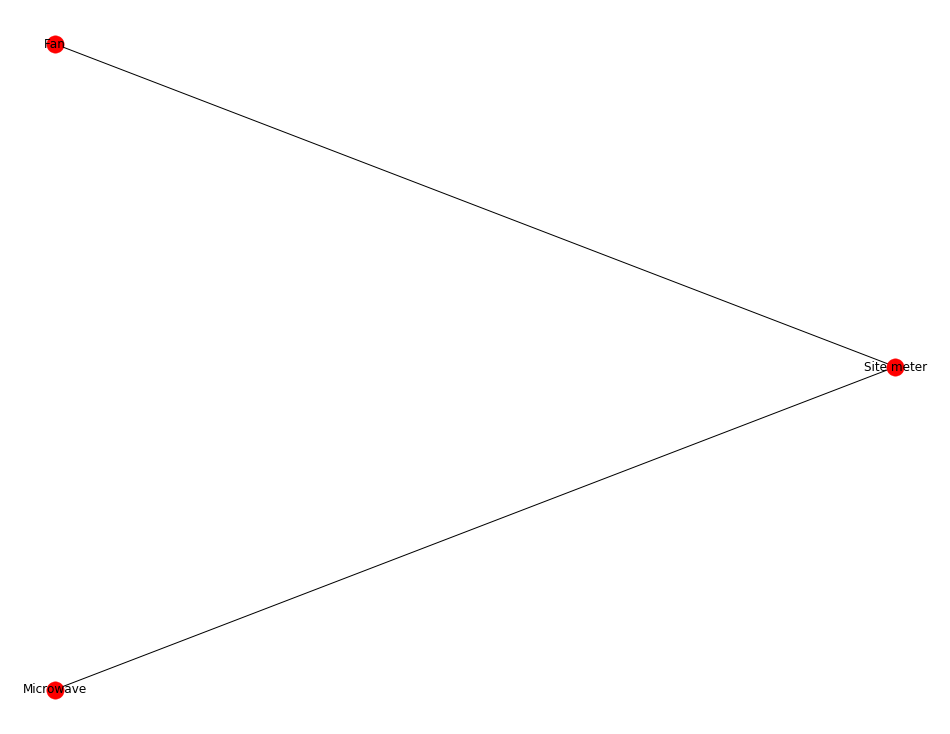

In [66]:
elec.draw_wiring_graph()


Importamos os algoritmos que desejamos executar os experimentos:
- Mean: Mean Algorithm
- Hart's Algorithm
- CO: Combinatorial Optimization
- Discriminative Sparse Coding
+ Additive Factorial Hidden Markov Model
+ Additive Factorial Hidden Markov Model with Signal Aggregate Constraints
+ DSC: Discriminative Sparse Coding
+ RNN: Long short-term memory - LSTM
+ DAE: Denoising Auto Encoder
+ Seq2Point*
+ Seq2Seq
+ WindowGRU/Online GRU: Similar a LSTM, mas usa Gated  Recurrent  Unit  (GRU)

- ELM

In [4]:
from nilmtk.disaggregate import Mean,CO,Hart85
# from nilmtk_contrib.disaggregate import AFHMM,AFHMM_SAC,DSC,RNN,Seq2Point,Seq2Seq,DAE,WindowGRU
from nilmtk_contrib.disaggregate import RNN,Seq2Point



Using TensorFlow backend.


Em seguida, inserimos os valores para os diferentes parâmetros no dicionário. Como precisamos de vários aparelhos, inserimos os nomes de todos os aparelhos necessários no parâmetro _'appliances'_.

Métricas: https://github.com/nilmtk/nilmtk/blob/master/nilmtk/losses.py

Error: https://github.com/nilmtk/nilmtk-contrib/issues/56

In [8]:
experiment1 = {
  'power': {'mains': ['active'],'appliance': ['active']},
  'sample_rate': 5,
  'display_predictions': True,
  'artificial_aggregate': False,
  'DROP_ALL_NANS': True,
  'site_only': False,
  #'chunksize': 20000,
  'appliances': ['microwave', 'fan'],
  'methods': {
      'Mean':Mean({}),
      "CO":CO({}),
      'Hart85':Hart85({}),
      'RNN':RNN({'n_epochs':50,'batch_size':1024}),
#       'Seq2Seq':Seq2Seq({'n_epochs':5,'batch_size':32})
      'Seq2Point':Seq2Point({'n_epochs':50,'batch_size':1024})
      #"DSC":{'learning_rate':5*1e-10,'iterations':100}
      #"AFHMM":AFHMM({}),
      #"AFHMM_SAC":AFHMM_SAC({}),
      #FHMM_EXACT({'num_of_states':2})
      #'Convlstm': Convlstm({'n_epochs':30,}),
  },
  'train': {    
    'datasets': {
        'Redd': {
            'path': './data/teste10.h5',
            'buildings': {
                1: {
                    'start_time': '2021-09-02',
                    'end_time': '2021-09-04'
                    }
                }                
            }
        }
    },
  'test': {
    'datasets': {
        'Redd': {
            'path': './data/teste10.h5',
            'buildings': {
                1: {
                    'start_time': '2021-09-05',
                    'end_time': '2021-09-06'
                    }
                }
            }
        },
        'metrics':['rmse', 'mae', 'relative_error', 'r2score', 'nde', 'nep', 'f1score']
    }
}


In this example experimental setup, we have set the _sample rate_ at 60Hz and use Combinatorial Optimisation to disaggregate the required appliances from building 10 in the dataport dataset with the _RMSE_ metric to measure the accuracy. We also specify the dates for training and testing

Next we provide this experiment dictionary as input to the API.

Joint Testing for all algorithms
Loading data for  Redd  dataset
Dropping missing values
Generating predictions for : Mean
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Generating predictions for : Hart85ave'
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Generating predictions for : RNN
Generating predictions for : Seq2Point
............  rmse  ..............
                Mean          CO      Hart85        RNN  Seq2Point
microwave  81.208117  710.920948  749.999958  93.682481  81.004409
fan        41.437562   63.119786   68.025881  32.959566  31.548666
............  mae  ..............
                Mean          CO      Hart85        RNN  Seq2Point
microwave  17.200323  486.960693  553.253418  13.115963   7.302773
fan        40.981853   50.396896   57.150852  26.339155  25.144955
............  relative_error  ....

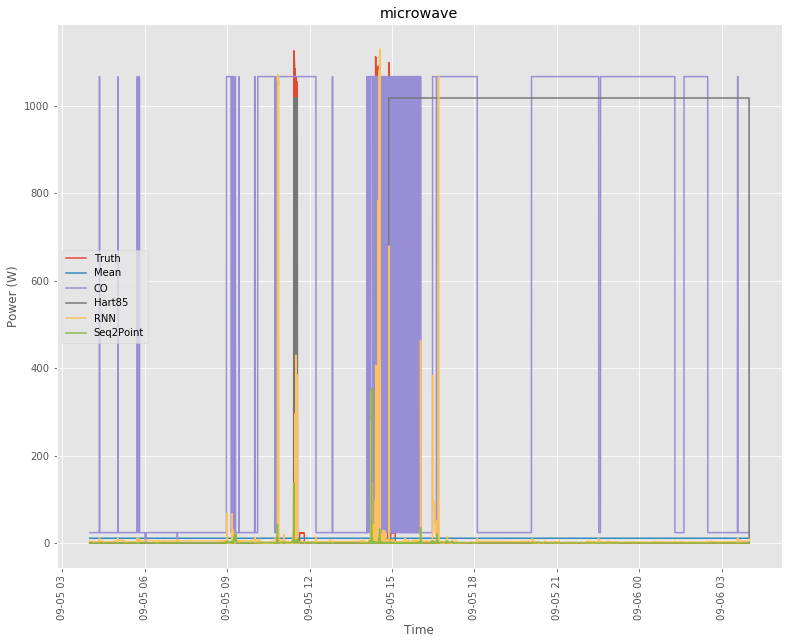

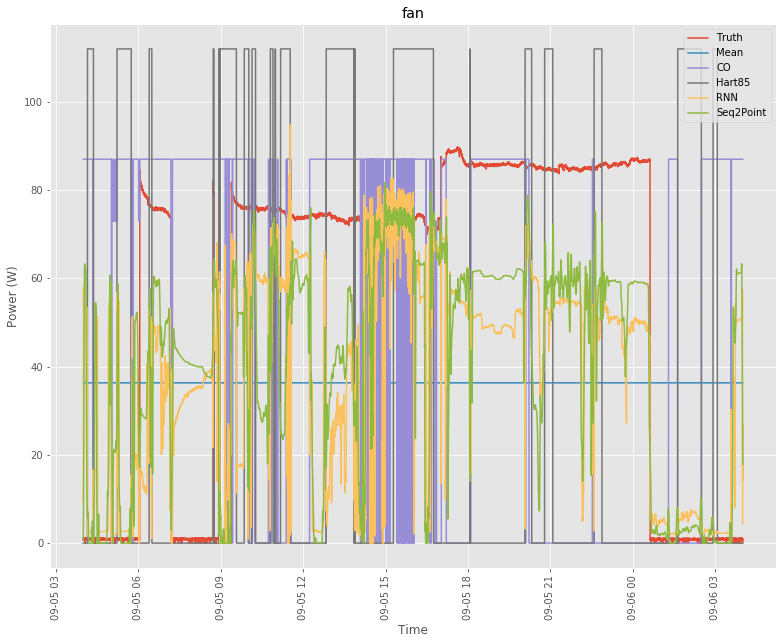

In [9]:
api_results_experiment_1 = API(experiment1)

raiz do erro quadrático médio (RMSE) e o erro médio absoluto (MAE)

Quanto menor o seu valor, melhor é o modelo, já que a previsão se mostra mais próxima ao valor real. Comparando as duas métricas têm se que o RMSE penaliza desvios grandes, enquanto o MAE tem pesos iguais para todos os desvios.


We can observe the prediction vs. truth graphs in the above cell. The accuracy metrics can be accessed using the following commands:

In [10]:
errors_keys = api_results_experiment_1.errors_keys
errors = api_results_experiment_1.errors
for i in range(len(errors)):
    print (errors_keys[i])
    print (errors[i])
    print ("\n\n")

Redd_1_rmse
                Mean          CO      Hart85        RNN  Seq2Point
microwave  81.208117  710.920948  749.999958  93.682481  81.004409
fan        41.437562   63.119786   68.025881  32.959566  31.548666



Redd_1_mae
                Mean          CO      Hart85        RNN  Seq2Point
microwave  17.200323  486.960693  553.253418  13.115963   7.302773
fan        40.981853   50.396896   57.150852  26.339155  25.144955



Redd_1_relative_error
               Mean         CO     Hart85       RNN  Seq2Point
microwave  1.422261   0.963681   3.409196  2.780659   2.410225
fan        1.098067  25.810015  41.241970  1.789826   1.920159



Redd_1_r2score
               Mean         CO     Hart85       RNN  Seq2Point
microwave -0.002878 -75.858507 -84.540510 -0.334646   0.002147
fan       -0.260763  -1.925338  -2.397765  0.202358   0.269186



Redd_1_nde
               Mean        CO    Hart85       RNN  Seq2Point
microwave  0.997994  8.736746  9.217001  1.151295   0.995490
fan        0.62

In [11]:
import numpy as np
import pandas as pd

vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_results_experiment_1.errors],axis=2)


cols = api_results_experiment_1.errors[0].columns
indexes = api_results_experiment_1.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("Standard Deviation")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                Mean          CO      Hart85        RNN  Seq2Point
microwave  14.775793  171.999114  187.631572  16.083603  13.264612
fan        12.205573   19.977519   23.780594   9.020677   8.672057



Standard Deviation
                Mean          CO      Hart85        RNN  Seq2Point
microwave  27.702164  279.412752  301.454921  31.961299  27.752404
fan        18.348342   25.077540   28.395279  13.174482  12.570605


In [27]:
print (vals)

[[[ 8.12081172e+01  1.72003231e+01  1.42226064e+00 -2.87826246e-03
    9.97993767e-01  2.55080581e+00  5.39289434e-02]
  [ 7.10920948e+02  4.86960693e+02  9.63680804e-01 -7.58585072e+01
    8.73674583e+00  7.22162094e+01  5.40289855e-02]
  [ 7.49999958e+02  5.53253418e+02  3.40919638e+00 -8.45405104e+01
    9.21700096e+00  8.20474091e+01  3.45329727e-02]
  [ 9.36824809e+01  1.31159630e+01  2.78065872e+00 -3.34645970e-01
    1.15129542e+00  1.94509566e+00  2.44372990e-01]
  [ 8.10044095e+01  7.30277348e+00  2.41022539e+00  2.14673717e-03
    9.95490313e-01  1.08300042e+00  5.42372881e-02]]

 [[ 4.14375619e+01  4.09818535e+01  1.09806728e+00 -2.60762636e-01
    6.24316931e-01  7.42869258e-01  8.15107103e-01]
  [ 6.31197863e+01  5.03968964e+01  2.58100147e+01 -1.92533758e+00
    9.50991094e-01  9.13533628e-01  5.76745867e-01]
  [ 6.80258812e+01  5.71508522e+01  4.12419701e+01 -2.39776469e+00
    1.02490854e+00  1.03596115e+00  3.82349285e-01]
  [ 3.29595663e+01  2.63391552e+01  1.78982615